In [ ]:
# This code is for reference only, it is from a previous setup that was then replaced by voter

In [5]:
import torch
import torch.nn as nn
from constants import LABELS
from my_dataset import MyDataset as DS
from model_manager import ModelManager as Manager
from model_manager import MyNN

train_filepaths = ["standard1/train.csv", 
                   "augment_class3_4times_with_time_mixup/train.csv", "augment_class3_10times_with_time_mixup/train.csv", "augment_class3_20times_with_time_mixup/train.csv", 
                   "augment_class1_1times_with_time_mixup/train.csv", "augment_class4_15times_with_time_mixup/train.csv", "augment_class5_15times_with_time_mixup/train.csv", 
                   "augment_class6_15times_with_time_mixup/train.csv", "augment_class7_15times_with_time_mixup/train.csv","augment_class8_15times_with_time_mixup/train.csv"]
test_filepaths = ["standard1/test.csv"]
train_loader = DS.get_loader(train_filepaths, shuffle=True, batch_size=64, num_workers=63)
test_loader = DS.get_loader(test_filepaths, batch_size=64, num_workers=63)

num_items = len(train_loader.dataset)
print("Train Items: ", num_items)

num_classes = len(LABELS) #9
num_features = train_loader.dataset.datasets[0].num_features
model_class = MyNN
shallow_model_body = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, num_classes))
deep_model_body = nn.Sequential(
    nn.Linear(num_features, 700),
    nn.ReLU(),
    nn.Linear(700, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, num_classes))

deeper_model_body = nn.Sequential(
    nn.Linear(num_features, 900),
    nn.ReLU(),
    nn.Linear(900, 700),
    nn.ReLU(),
    nn.Linear(700, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, num_classes))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
Xrelweights = torch.tensor([3, 4, 3, 2, 1, 1, 1, 1, 2], dtype=torch.float)
Xweights = Xrelweights / Xrelweights.mean()
Xloss_fn = nn.CrossEntropyLoss(weight=Xweights.to(device))

Yrelweights = torch.tensor([3, 3, 3, 1, 1, 1, 1, 1, 1], dtype=torch.float)
Yweights = Yrelweights / Yrelweights.mean()
Yloss_fn = nn.CrossEntropyLoss(weight=Yweights.to(device))

Zrelweights = torch.tensor([1, 1.5, 1, 5, 1.5, 1.5, 1.5, 1.5, 3], dtype=torch.float)
Zweights = Zrelweights / Zrelweights.mean()
Zloss_fn = nn.CrossEntropyLoss(weight=Zweights.to(device))

Wrelweights = torch.tensor([100, .1, 100, .1, .1, .1, .1, .1, .1], dtype=torch.float)
Wweights = Wrelweights / Wrelweights.mean()
Wloss_fn = nn.CrossEntropyLoss(weight=Wweights.to(device))

Arelweights = torch.tensor([1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=torch.float)
Aweights = Arelweights / Arelweights.mean()
Aloss_fn = nn.CrossEntropyLoss(weight=Aweights.to(device))

Brelweights = torch.tensor([1, .5, 1, 0, 0, .25, .25, 0, 0], dtype=torch.float)
Bweights = Brelweights / Brelweights.mean()
Bloss_fn = nn.CrossEntropyLoss(weight=Bweights.to(device))

loss_fn = nn.CrossEntropyLoss()

print("done")

Train Items:  32761
done


/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 822 K  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
822 K     Trainable params
0         Non-trainable params
822 K     Total params
3.289     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=8` reached.


Train Time (s): 91.06965947151184


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7669903039932251     │
│         test_loss         │    0.5922220349311829     │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.573615550994873


<Figure size 1600x1600 with 0 Axes>

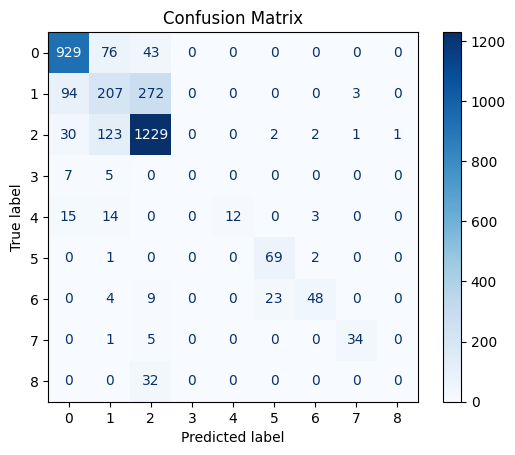

Logger Metics:  logs/run3_model1/version_0/metrics.csv


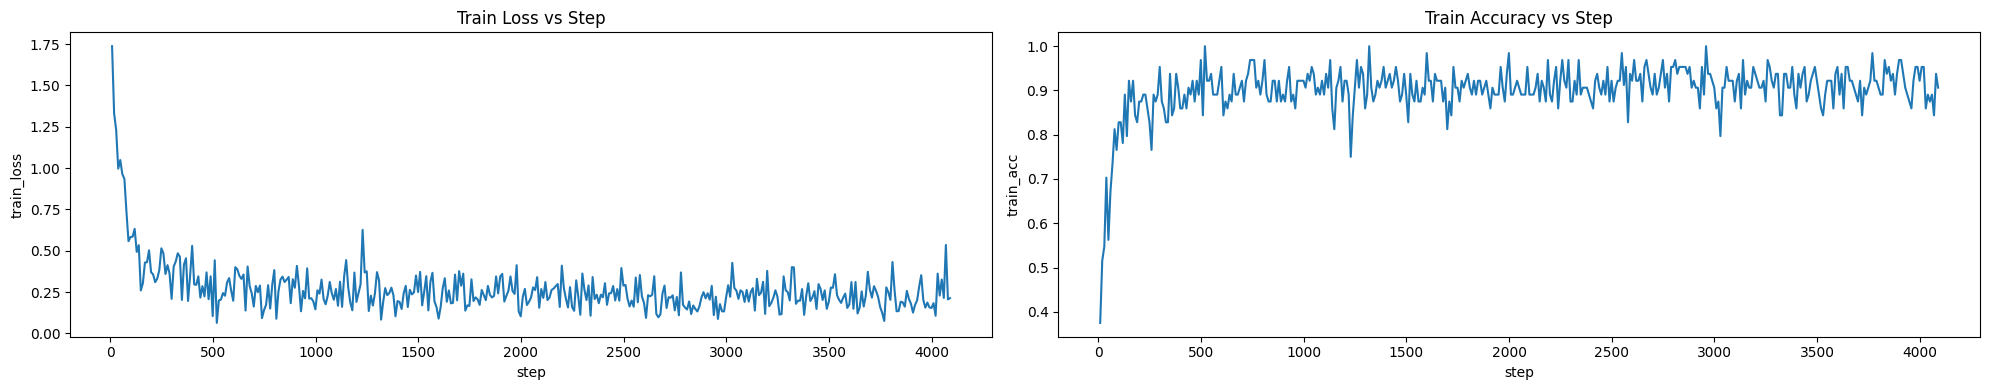

done


In [3]:
# 1.
model_name = "run3_model1" #### REMEMBER TO CHANGE THE NAME
max_epochs = 8
manager = Manager(model_name, max_epochs, model_class, shallow_model_body, loss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 1.4 M  | train
1 | loss_fn    | CrossEntropyLoss | 0      | eval 
--------------------------------------------------------
1.4 M     Trainable params
0         Non-trainable params
1.4 M     Total params
5.736     Total estimated model params size (MB)
8         Modules in train mode
1         Modules in eval mode
/usr/local/lib/python3.12/site-packages/pytorch_lightning/loops/fit_loop.py:527: Found 1 module(s) in eval mode at 

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=8` reached.


Train Time (s): 118.9647467136383


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7697208523750305     │
│         test_loss         │    0.5860439538955688     │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.7626595497131348


<Figure size 1600x1600 with 0 Axes>

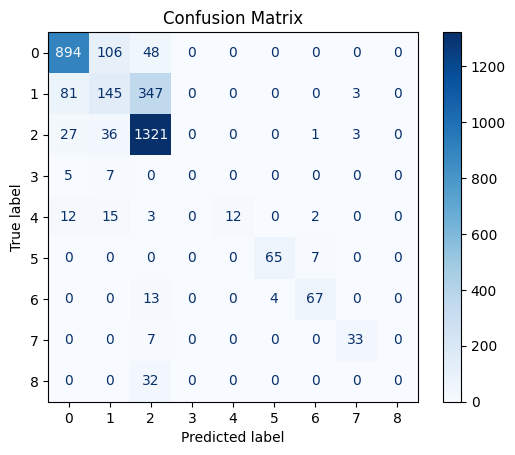

Logger Metics:  logs/run3_model2/version_0/metrics.csv


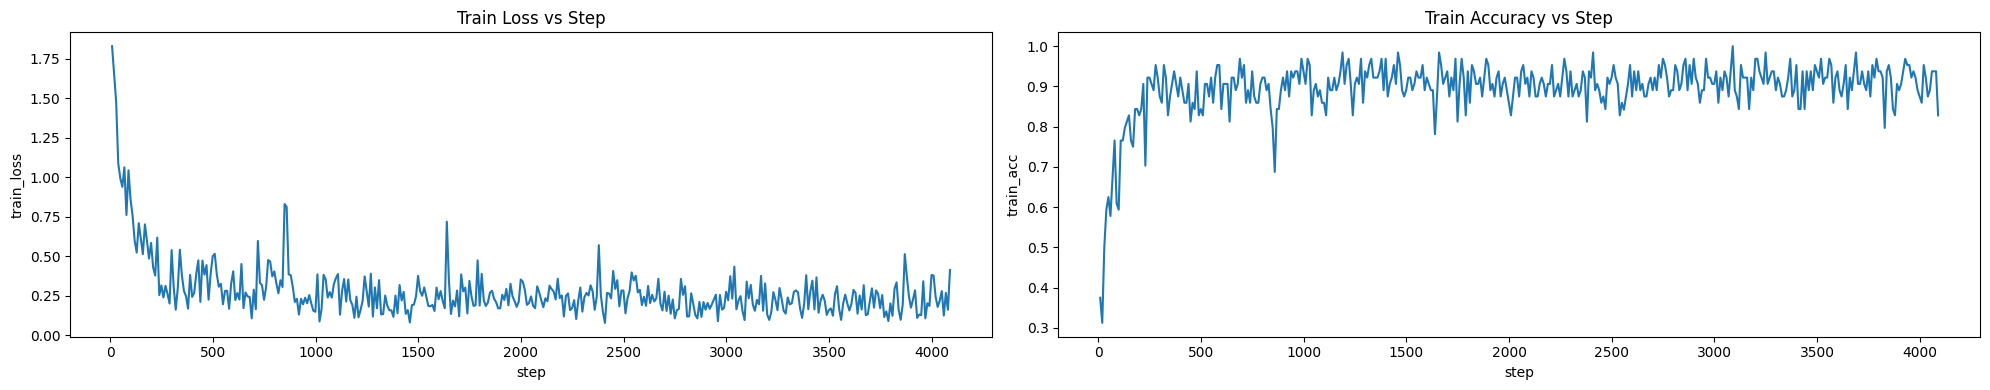

done


In [4]:
# 2.
model_name = "run3_model2" #### REMEMBER TO CHANGE THE NAME
max_epochs = 8
manager = Manager(model_name, max_epochs, model_class, deep_model_body, loss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 1.4 M  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
1.4 M     Trainable params
0         Non-trainable params
1.4 M     Total params
5.736     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=4` reached.


Train Time (s): 59.4096999168396


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7679004669189453     │
│         test_loss         │    0.5894254446029663     │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.7495014667510986


<Figure size 1600x1600 with 0 Axes>

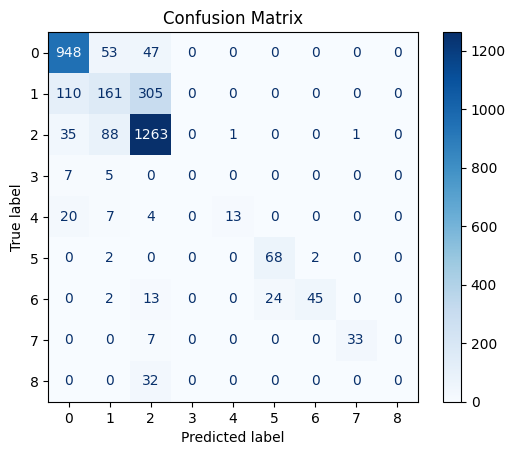

Logger Metics:  logs/run3_model2/version_1/metrics.csv


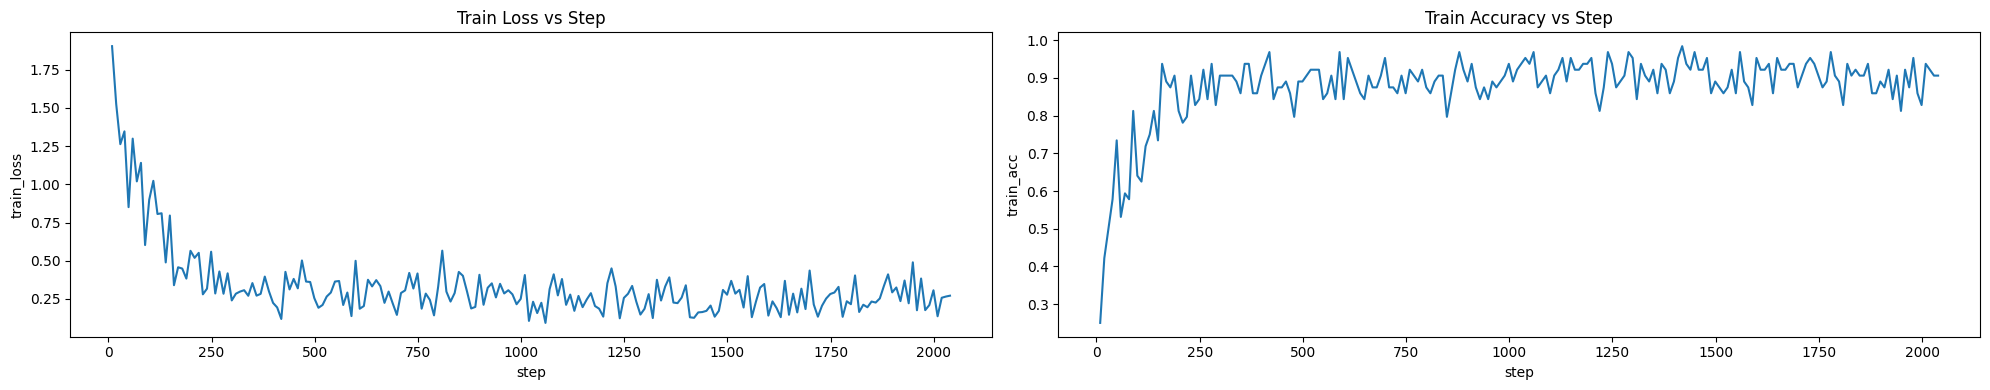

done


In [6]:
# 2.
model_name = "run3_model2" #### REMEMBER TO CHANGE THE NAME
max_epochs = 4
manager = Manager(model_name, max_epochs, model_class, deep_model_body, loss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 2.3 M  | train
1 | loss_fn    | CrossEntropyLoss | 0      | eval 
--------------------------------------------------------
2.3 M     Trainable params
0         Non-trainable params
2.3 M     Total params
9.335     Total estimated model params size (MB)
10        Modules in train mode
1         Modules in eval mode
/usr/local/lib/python3.12/site-packages/pytorch_lightning/loops/fit_loop.py:527: Found 1 module(s) in eval mode at 

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=4` reached.


Train Time (s): 77.84310746192932


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7487863898277283     │
│         test_loss         │    0.6765493750572205     │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.8564057350158691


<Figure size 1600x1600 with 0 Axes>

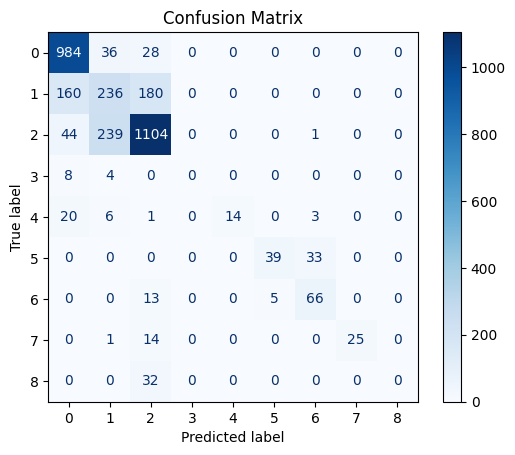

Logger Metics:  logs/run3_mode3/version_0/metrics.csv


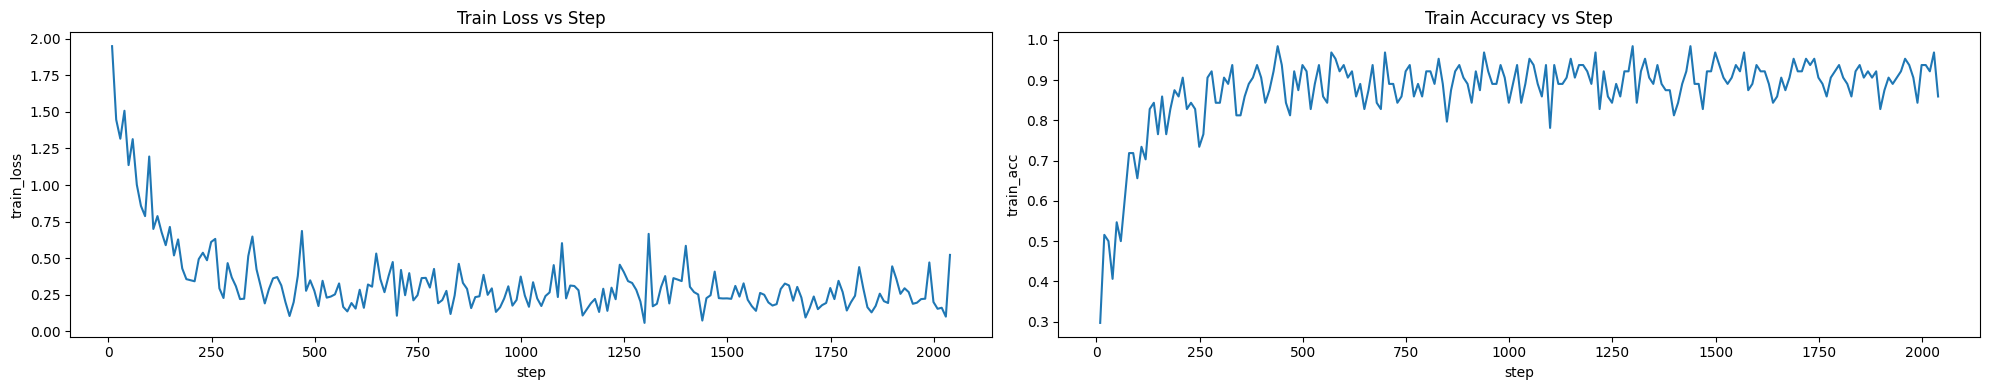

done


In [7]:
# 3.
model_name = "run3_mode3" #### REMEMBER TO CHANGE THE NAME
max_epochs = 4
manager = Manager(model_name, max_epochs, model_class, deeper_model_body, loss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 1.4 M  | eval 
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
1.4 M     Trainable params
0         Non-trainable params
1.4 M     Total params
5.736     Total estimated model params size (MB)
1         Modules in train mode
8         Modules in eval mode
/usr/local/lib/python3.12/site-packages/pytorch_lightning/loops/fit_loop.py:527: Found 8 module(s) in eval mode at 

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=4` reached.


Train Time (s): 65.68989133834839


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7675970792770386     │
│         test_loss         │    0.5737066268920898     │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.8644967079162598


<Figure size 1600x1600 with 0 Axes>

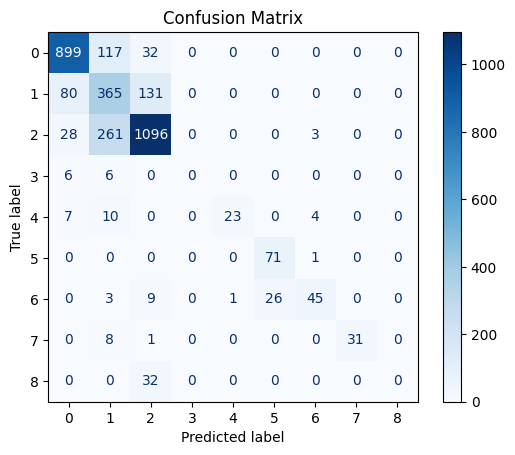

Logger Metics:  logs/run3_modelmanyloss/version_0/metrics.csv


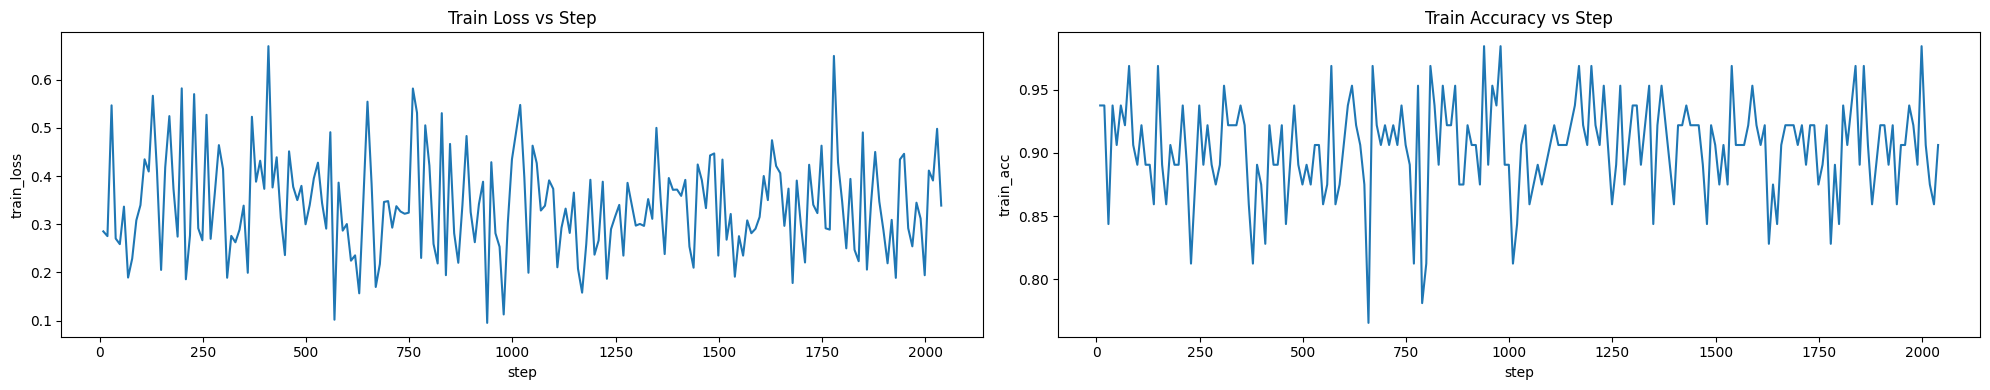

/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 1.4 M  | eval 
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
1.4 M     Trainable params
0         Non-trainable params
1.4 M     Total params
5.736     Total estimated model params size (MB)
1         Modules in train mode
8         Modules in eval mode


done


/usr/local/lib/python3.12/site-packages/pytorch_lightning/loops/fit_loop.py:527: Found 8 module(s) in eval mode at the start of training. This may lead to unexpected behavior during training. If this is intentional, you can ignore this warning.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=4` reached.


Train Time (s): 66.52421975135803


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7833737730979919     │
│         test_loss         │    0.5144132375717163     │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.7680447101593018


<Figure size 1600x1600 with 0 Axes>

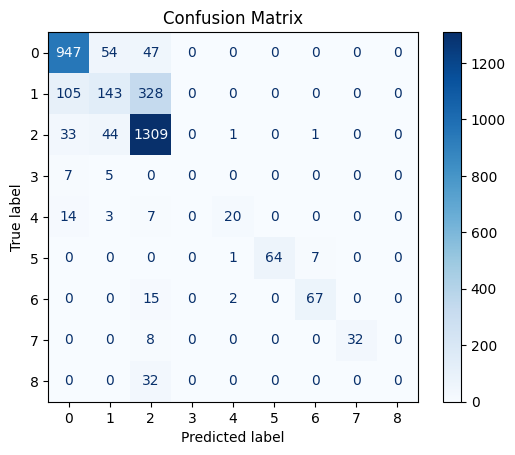

Logger Metics:  logs/run3_modelmanyloss/version_1/metrics.csv


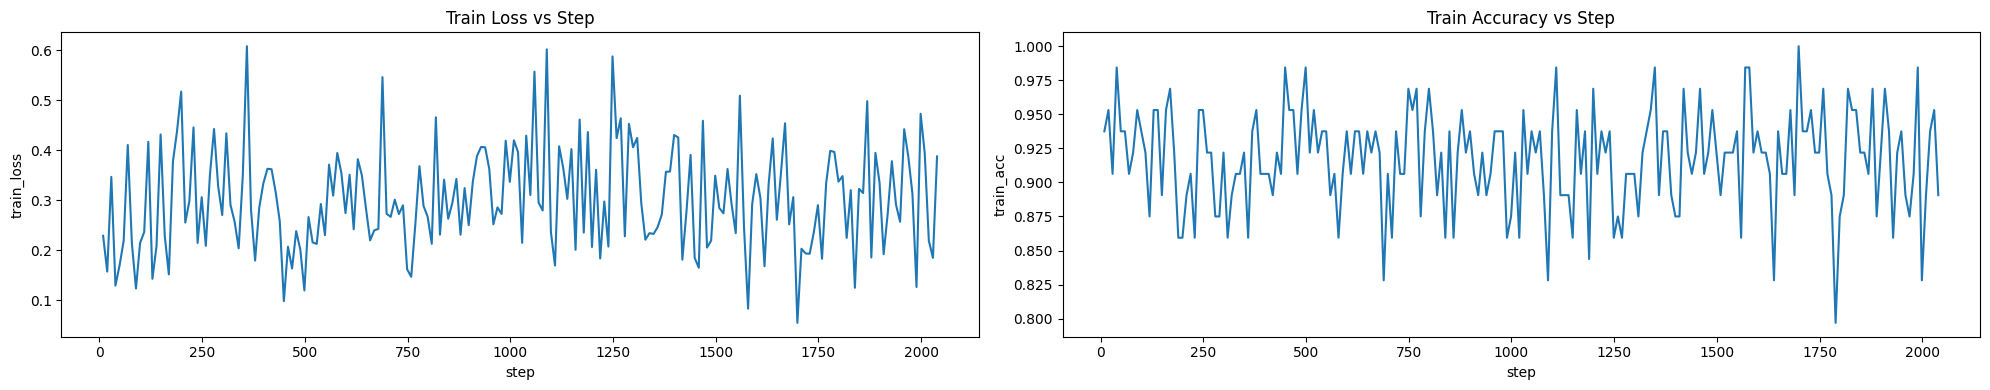

/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 1.4 M  | eval 
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
1.4 M     Trainable params
0         Non-trainable params
1.4 M     Total params
5.736     Total estimated model params size (MB)
1         Modules in train mode
8         Modules in eval mode


done


/usr/local/lib/python3.12/site-packages/pytorch_lightning/loops/fit_loop.py:527: Found 8 module(s) in eval mode at the start of training. This may lead to unexpected behavior during training. If this is intentional, you can ignore this warning.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=4` reached.


Train Time (s): 65.35552453994751


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7448422312736511     │
│         test_loss         │    0.7814137935638428     │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.7643256187438965


<Figure size 1600x1600 with 0 Axes>

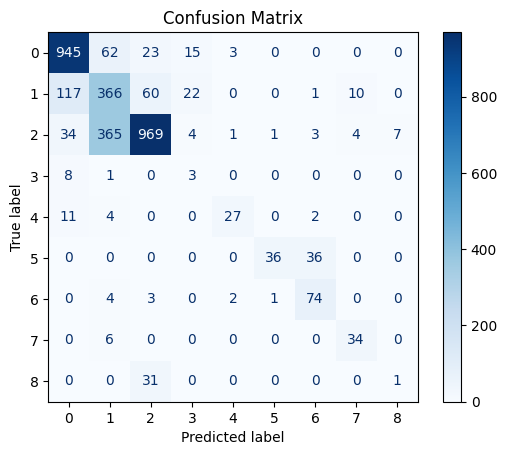

Logger Metics:  logs/run3_modelmanyloss/version_2/metrics.csv


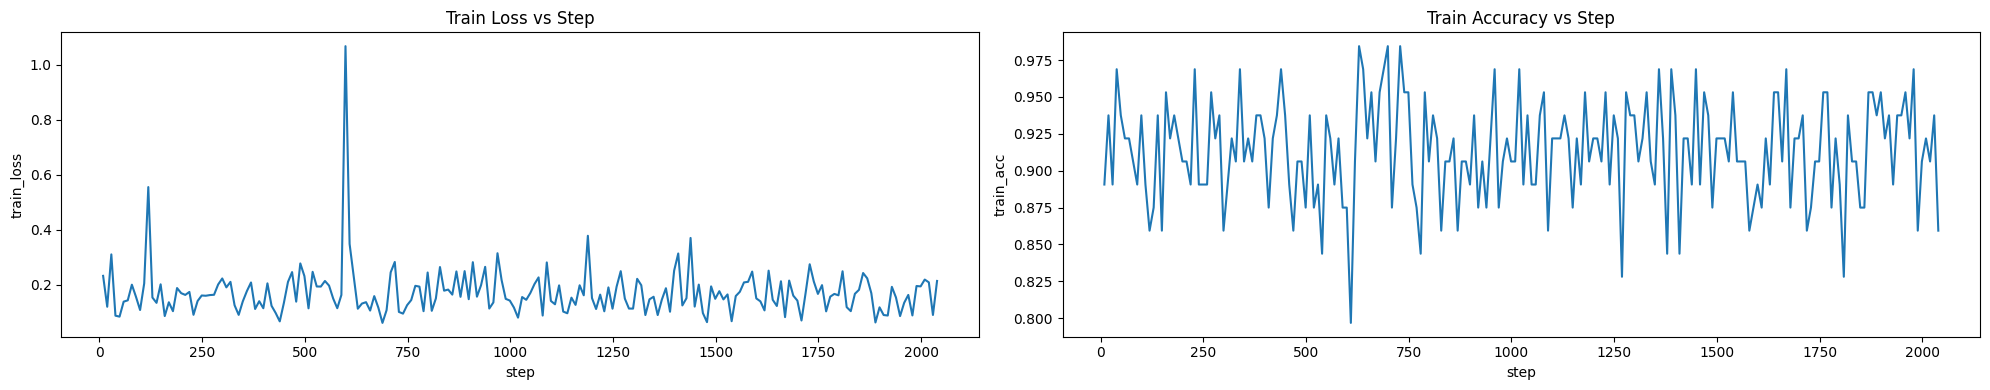

/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 1.4 M  | eval 
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
1.4 M     Trainable params
0         Non-trainable params
1.4 M     Total params
5.736     Total estimated model params size (MB)
1         Modules in train mode
8         Modules in eval mode


done


/usr/local/lib/python3.12/site-packages/pytorch_lightning/loops/fit_loop.py:527: Found 8 module(s) in eval mode at the start of training. This may lead to unexpected behavior during training. If this is intentional, you can ignore this warning.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=4` reached.


Train Time (s): 67.25929808616638


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7345266938209534     │
│         test_loss         │    0.17297986149787903    │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.7901837825775146


<Figure size 1600x1600 with 0 Axes>

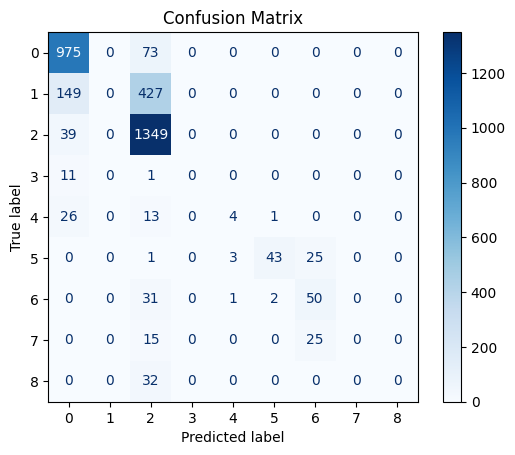

Logger Metics:  logs/run3_modelmanyloss/version_3/metrics.csv


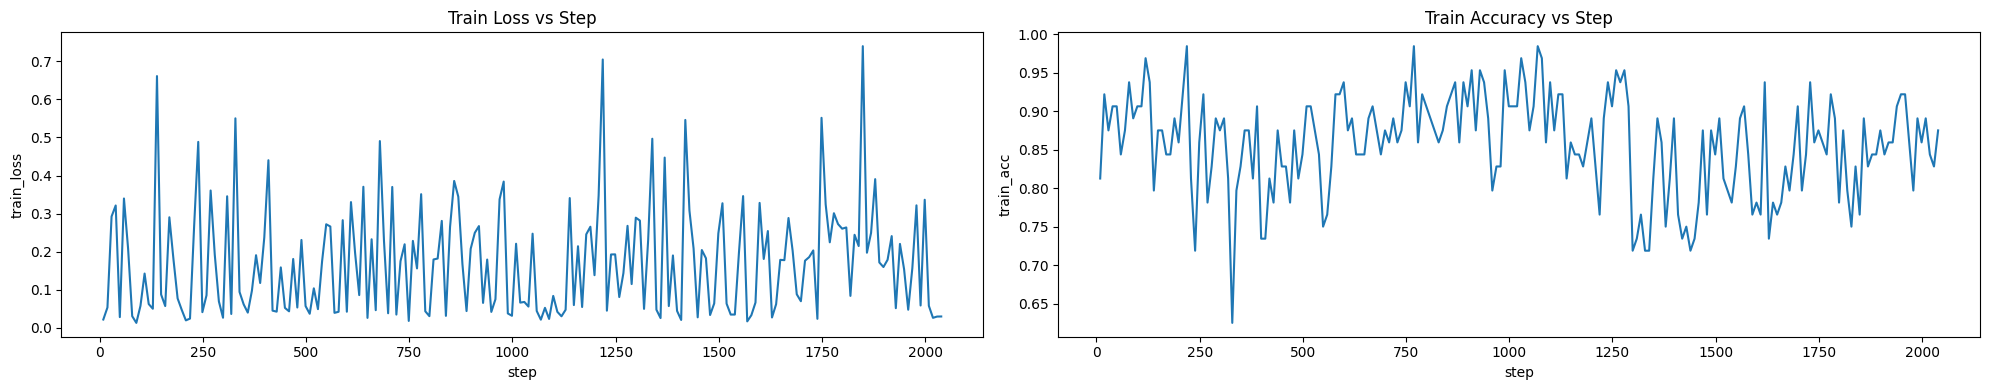

/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 1.4 M  | eval 
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
1.4 M     Trainable params
0         Non-trainable params
1.4 M     Total params
5.736     Total estimated model params size (MB)
1         Modules in train mode
8         Modules in eval mode


done


/usr/local/lib/python3.12/site-packages/pytorch_lightning/loops/fit_loop.py:527: Found 8 module(s) in eval mode at the start of training. This may lead to unexpected behavior during training. If this is intentional, you can ignore this warning.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=4` reached.


Train Time (s): 67.5389654636383


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7351334691047668     │
│         test_loss         │    0.5047951936721802     │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.8671071529388428


<Figure size 1600x1600 with 0 Axes>

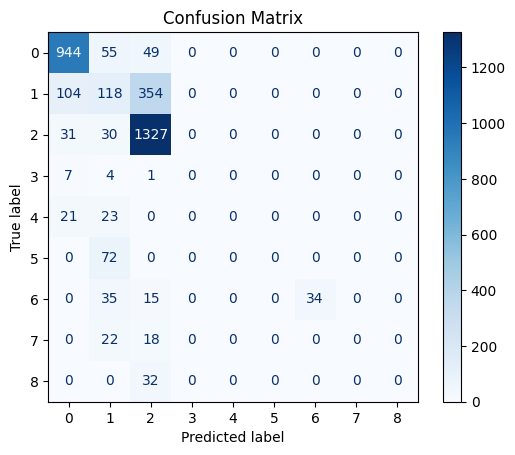

Logger Metics:  logs/run3_modelmanyloss/version_4/metrics.csv


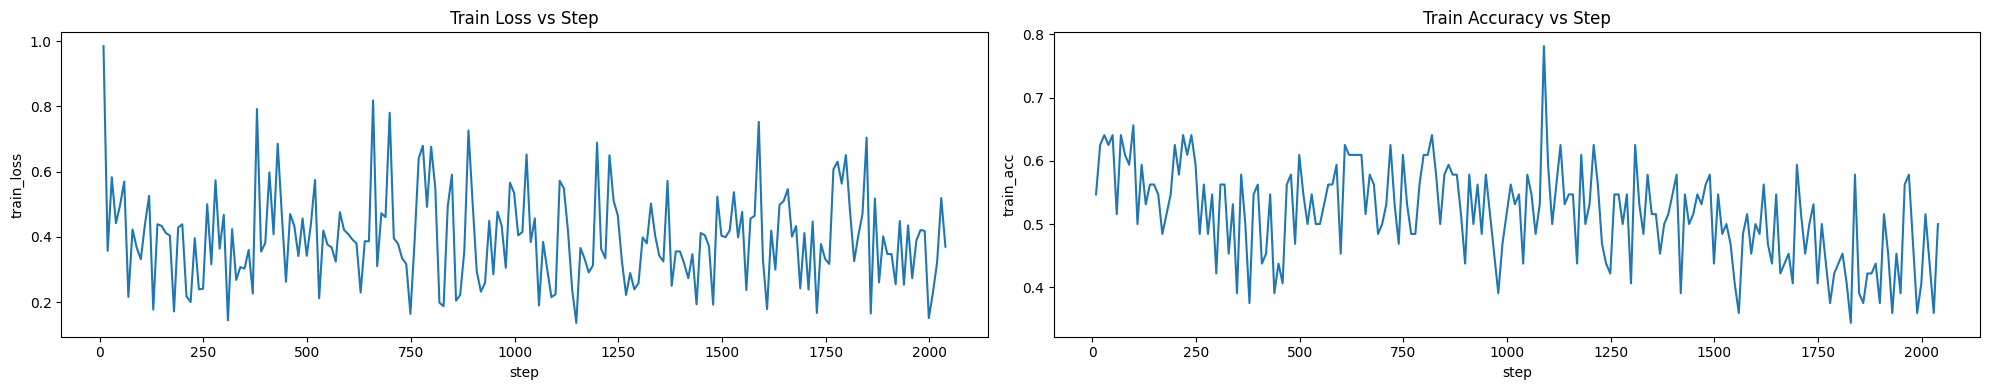

/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 1.4 M  | eval 
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
1.4 M     Trainable params
0         Non-trainable params
1.4 M     Total params
5.736     Total estimated model params size (MB)
1         Modules in train mode
8         Modules in eval mode


done


/usr/local/lib/python3.12/site-packages/pytorch_lightning/loops/fit_loop.py:527: Found 8 module(s) in eval mode at the start of training. This may lead to unexpected behavior during training. If this is intentional, you can ignore this warning.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=4` reached.


Train Time (s): 68.22372078895569


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7627426981925964     │
│         test_loss         │    0.4180108904838562     │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.8780055046081543


<Figure size 1600x1600 with 0 Axes>

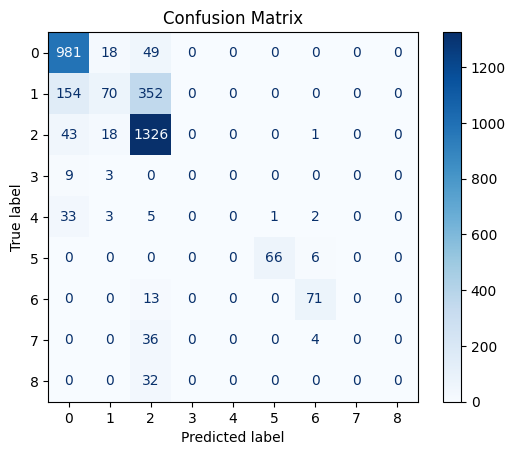

Logger Metics:  logs/run3_modelmanyloss/version_5/metrics.csv


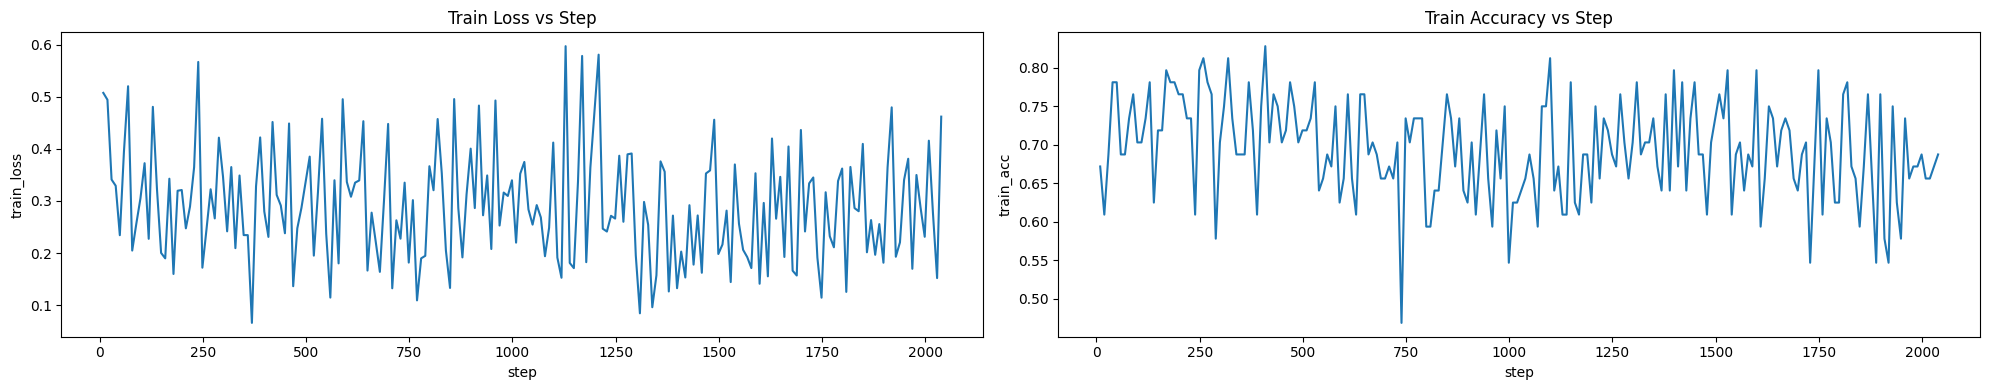

done


In [8]:
# 2.
model_name = "run3_modelmanyloss" #### REMEMBER TO CHANGE THE NAME
max_epochs = 4
manager = Manager(model_name, max_epochs, model_class, deep_model_body, Xloss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

# 2.
model_name = "run3_modelmanyloss" #### REMEMBER TO CHANGE THE NAME
max_epochs = 4
manager = Manager(model_name, max_epochs, model_class, deep_model_body, Yloss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

model_name = "run3_modelmanyloss" #### REMEMBER TO CHANGE THE NAME
max_epochs = 4
manager = Manager(model_name, max_epochs, model_class, deep_model_body, Zloss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

model_name = "run3_modelmanyloss" #### REMEMBER TO CHANGE THE NAME
max_epochs = 4
manager = Manager(model_name, max_epochs, model_class, deep_model_body, Wloss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

model_name = "run3_modelmanyloss" #### REMEMBER TO CHANGE THE NAME
max_epochs = 4
manager = Manager(model_name, max_epochs, model_class, deep_model_body, Aloss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

model_name = "run3_modelmanyloss" #### REMEMBER TO CHANGE THE NAME
max_epochs = 4
manager = Manager(model_name, max_epochs, model_class, deep_model_body, Bloss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")